# Victims of Mass Shootings Visualization

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
from datetime import datetime
import gmaps.datasets
import gmaps.geojson_geometries

from config import (census_key, gkey)

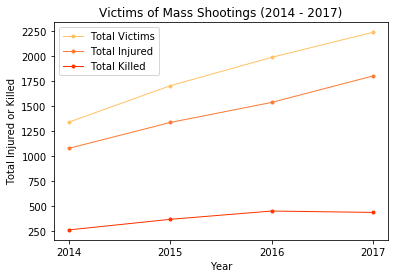

<Figure size 432x288 with 0 Axes>

In [2]:
#load in df from exploration data
totals_df = pd.read_csv("totals_df.csv")
totals_df = pd.DataFrame(data = totals_df)
totals_df['Year'] = totals_df['Year'].astype(str) #change year to string for a neat x axis on graph

#create graph over time of those injured or killed
total, = plt.plot(totals_df['Year'], totals_df['Total Injured or Killed'], color = str('#ffc266'),linewidth=1, label ="Total Victims", marker = '.')
injured, = plt.plot(totals_df['Year'], totals_df['Total Injured'], color=str('#ff7a33'), linewidth=1, label="Total Injured", marker = ".")
killed, = plt.plot(totals_df['Year'], totals_df['Total Killed'], color=str('#ff3300'), linewidth=1, label="Total Killed", marker = ".")
plt.legend(handles=[total, injured, killed])
plt.xlabel('Year')
plt.title("Victims of Mass Shootings (2014 - 2017)")
plt.ylabel('Total Injured or Killed')
plt.show()

plt.savefig("Plots/Overall_Victims.png")

# Total Number of Mass Shootings Visualization

In [3]:
#load in df from exploration data
total_mass_shootings = pd.read_csv("total_mass_shootings.csv")
total_mass_shootings = pd.DataFrame(data = total_mass_shootings)
total_mass_shootings.dtypes
total_mass_shootings['years'] = total_mass_shootings['years'].astype(str) #convert years to object for neat x axis on plot
total_mass_shootings

,years,total_shootings
0,2014,268
1,2015,335
2,2016,382
3,2017,346


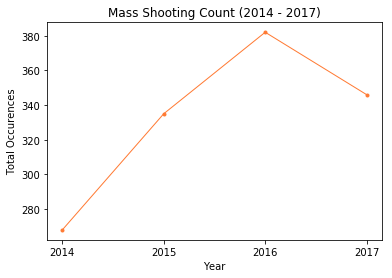

<Figure size 432x288 with 0 Axes>

In [4]:
colors = str('#ff7a33')
total, = plt.plot(total_mass_shootings['years'], total_mass_shootings['total_shootings'], color = colors,linewidth=1, marker = '.')

plt.xlabel('Year')
plt.title("Mass Shooting Count (2014 - 2017)")
plt.ylabel('Total Occurences')
plt.show()
plt.savefig("Plots/Overall_Count.png")

# Heatmaps with gmaps

In [5]:
#load in df from exploration data
merged_2014 = pd.read_csv("merged_2014.csv")
merged_2015 = pd.read_csv("merged_2015.csv")
merged_2016 = pd.read_csv("merged_2016.csv")
merged_2017 = pd.read_csv("merged_2017.csv")

In [6]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [7]:
#2014 
#define location and heatpoint
locations = merged_2014[['Latitude', 'Longitude']]
rating = merged_2014['Mass Shooting Count']

# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [10]:
#2014
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2014[['Latitude', 'Longitude']], weights=merged_2014['Mass Shooting Count'], dissipating = False,
   opacity = 1, max_intensity=10, point_radius=2
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = [
   '#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [9]:
#2015 
#define location and heatpoint
locations = merged_2015[['Latitude', 'Longitude']]
rating = merged_2015['Mass Shooting Count']
# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [11]:
#2015
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2015[['Latitude', 'Longitude']], weights=merged_2015['Mass Shooting Count'], dissipating = False,
   opacity = 1, max_intensity=10, point_radius=2
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = ['#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [11]:
#2016 
#define location and heatpoint
locations = merged_2016[['Latitude', 'Longitude']]
rating = merged_2016['Mass Shooting Count']
# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [15]:
#2016
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2016[['Latitude', 'Longitude']], weights=merged_2016['Mass Shooting Count'], dissipating = False,
   opacity = 1, max_intensity=10, point_radius=2
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = ['#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [13]:
#2017 
#define location and heatpoint
locations = merged_2017[['Latitude', 'Longitude']]
rating = merged_2017['Mass Shooting Count']
# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [16]:
#2017
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2017[['Latitude', 'Longitude']], weights=merged_2017['Mass Shooting Count'], dissipating = False,
   opacity = 1, max_intensity=10, point_radius=2
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = ['#ffffff','#ff3300','#ff7a33','#ffc266' ]
# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# Heatmaps Per Capita with gmaps

In [16]:
#2014 
#magnify mass shooting per capita so it shows up on the map
#merged_2014['Per Capita Mass exp'] = merged_2014['Per Capita Mass Shooting'] *1500000

#define location and heatpoint
locations = merged_2014[['Latitude', 'Longitude']]
rating = merged_2014['Per Capita Mass Shooting']

# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [18]:
#2014
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2014[['Latitude', 'Longitude']], weights=merged_2014['Per Capita Mass Shooting'] * 10, dissipating = False,
   opacity = 1, max_intensity=10, point_radius=1
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient =['#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [18]:
#2015 
#magnify mass shooting per capita so it shows up on the map
merged_2015['Per Capita Mass exp'] = merged_2015['Per Capita Mass Shooting'] *10

#define location and heatpoint
locations = merged_2015[['Latitude', 'Longitude']]
rating = merged_2015['Per Capita Mass exp']

# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [19]:
#2015
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2015[['Latitude', 'Longitude']], weights=merged_2015['Per Capita Mass Shooting'] * 10, dissipating = False,
   opacity = 1, max_intensity=10, point_radius=1
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = ['#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [20]:
#2016 
#magnify mass shooting per capita so it shows up on the map
merged_2016['Per Capita Mass exp'] = merged_2016['Per Capita Mass Shooting'] *10

#define location and heatpoint
locations = merged_2016[['Latitude', 'Longitude']]
rating = merged_2016['Per Capita Mass exp']

# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [23]:
#2016
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2016[['Latitude', 'Longitude']], weights=merged_2016['Per Capita Mass Shooting'] * 10, dissipating = False,
   opacity = 1, max_intensity=10, point_radius=1
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = ['#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [22]:
#2017
#magnify mass shooting per capita so it shows up on the map
merged_2017['Per Capita Mass exp'] = merged_2017['Per Capita Mass Shooting'] * 10

#define location and heatpoint
locations = merged_2017[['Latitude', 'Longitude']]
rating = merged_2017['Per Capita Mass exp']

# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [22]:
#2017
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2017[['Latitude', 'Longitude']], weights=merged_2017['Per Capita Mass Shooting'] * 10, dissipating = False,
   opacity = 1, max_intensity=10, point_radius=1
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient =  ['#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# Scatter Plots with Census Data

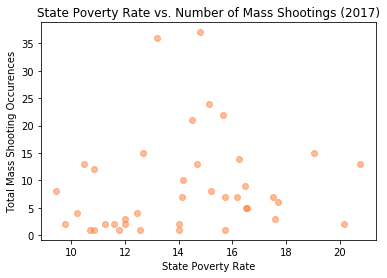

<Figure size 432x288 with 0 Axes>

In [24]:
#Poverty Rates
plt.scatter(merged_2017['Poverty Rates'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Poverty Rate')
plt.title("State Poverty Rate vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig("Plots/Poverty_Rate.png")

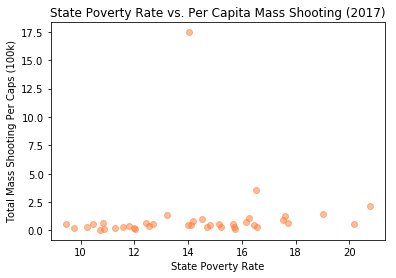

<Figure size 432x288 with 0 Axes>

In [25]:
#Poverty Rates per capita
plt.scatter(merged_2017['Poverty Rates'], merged_2017['Per Capita Mass Shooting'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Poverty Rate')
plt.title("State Poverty Rate vs. Per Capita Mass Shooting (2017)")
plt.ylabel('Total Mass Shooting Per Caps (100k)')
plt.show()

plt.savefig("Plots/Poverty_Rate_percaps.png")

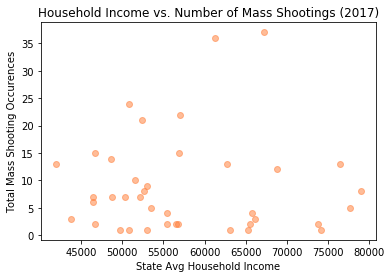

<Figure size 432x288 with 0 Axes>

In [26]:
#Household Income
plt.scatter(merged_2017['Household Income'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Avg Household Income')
plt.title("Household Income vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig('Plots/Household_Income.png')

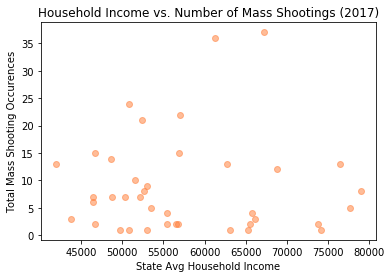

['Per Capita Mass Shooting']

<Figure size 432x288 with 0 Axes>

In [27]:
#Household Income
plt.scatter(merged_2017['Household Income'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Avg Household Income')
plt.title("Household Income vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig('Plots/Household_Income.png')

['Per Capita Mass Shooting']

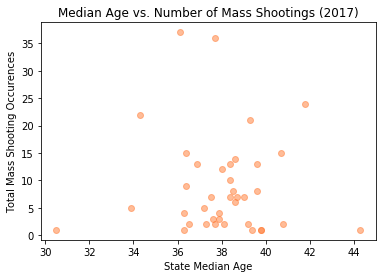

<Figure size 432x288 with 0 Axes>

In [28]:
#Median Age
plt.scatter(merged_2017['Median Age'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Median Age')
plt.title("Median Age vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig('Plots/Median_Age.png')

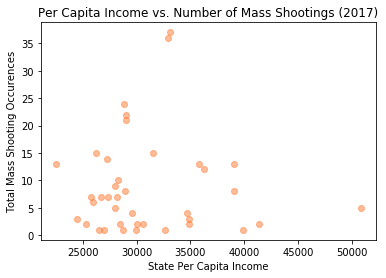

<Figure size 432x288 with 0 Axes>

In [29]:
#Per Capita Income
plt.scatter(merged_2017['Per Capita Income'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Per Capita Income')
plt.title("Per Capita Income vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig('Plots/Income.png')

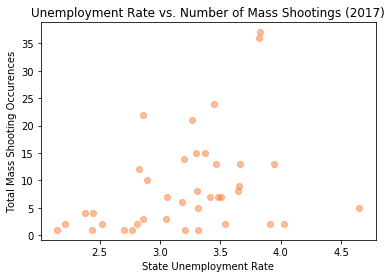

<Figure size 432x288 with 0 Axes>

In [30]:
#Unemployment Rate
plt.scatter(merged_2017['Unemployment Rates'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Unemployment Rate')
plt.title("Unemployment Rate vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig('Plots/Unemployment_Rate.png')

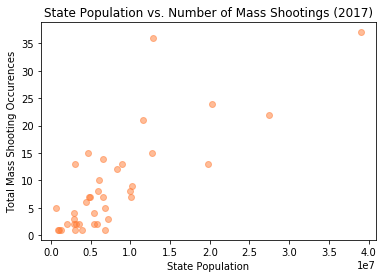

<Figure size 432x288 with 0 Axes>

In [31]:
plt.scatter(merged_2017['Population'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Population')
plt.title("State Population vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig('Plots/Population.png')

# Hate Group Data

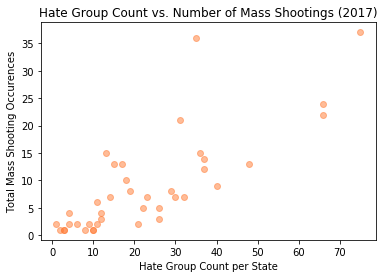

<Figure size 432x288 with 0 Axes>

In [24]:
#2017 hate group count
hate_group_merged = pd.read_csv("hate_group_merged.csv")
plt.scatter(hate_group_merged['Hate Group Count'], hate_group_merged['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('Hate Group Count per State')
plt.title("Hate Group Count vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig('Plots/Hate_Groups.png')

In [25]:
#2017 Hate Group Count
#define location and heatpoint
locations = hate_group_merged[['Latitude', 'Longitude']]
rating = hate_group_merged['Hate Group Count']

# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [26]:
#2017 Hate Group Count
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   hate_group_merged[['Latitude', 'Longitude']], weights=hate_group_merged['Hate Group Count'] , dissipating = False,
   opacity = 1, max_intensity=10, point_radius=1
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = ['#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [27]:
#2017 Hate Group Count per Capita
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   hate_group_merged[['Latitude', 'Longitude']], weights=hate_group_merged['Per Capita Hate Group'] * 10 , dissipating = False,
   opacity = 1, max_intensity=10, point_radius=1
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = ['#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [101]:
#load files for analysis
hate_group_merged = pd.read_csv("hate_group_merged.csv")
hate_group_merged_2016 = pd.read_csv("hate_group_merged_2016.csv")
hate_group_merged_2015 = pd.read_csv("hate_group_merged_2015.csv")
hate_group_merged_2014 = pd.read_csv("hate_group_merged_2014.csv")

#get the total count of hategroups per year
total_2017 = hate_group_merged['Hate Group Count'].sum()
total_2016 = hate_group_merged_2016['Hate Group Count'].sum()
total_2015 = hate_group_merged_2015['Hate Group Count'].sum()
total_2014 = hate_group_merged_2014['Hate Group Count'].sum()

In [103]:
#combine all totals for visualizations
totals = {'Year': ['2014', '2015','2016','2017'], 'Total Hate Groups': [total_2014, total_2015, total_2016, total_2017]}

#Review dataframe
totals_df = pd.DataFrame(data = totals)
totals_df


,Year,Total Hate Groups
0,2014,726
1,2015,861
2,2016,862
3,2017,882


Text(0,0.5,'Number of Groups')

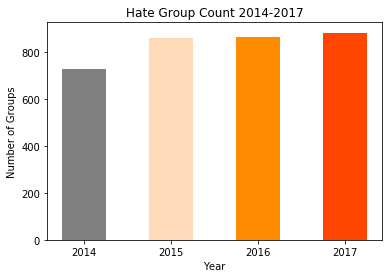

In [117]:
# Create a bar chart based upon the above data
plt.bar(totals_df['Year'], totals_df['Total Hate Groups'], width = 0.5, color=['grey','peachpuff','darkorange','orangered'] , align="center")
plt.title("Hate Group Count 2014-2017")
plt.xlabel("Year")
plt.ylabel("Number of Groups")

In [ ]:
hate_group_merged.sort_values(by=['Per Capita Hate Group'], ascending = False) 

In [35]:
#load in hategroup activity data
hate = pd.read_csv('Original_Hate_Data/splc-hate-groups-2017.csv')
hate = pd.DataFrame(data = hate)
#rename column for merge with full df
hate = hate.rename(columns = {'State':'States'})

hate

,Title,City,States,Group,Ideology,Headquarters,Statewide,Year
0,211 Bootboys,New York,New York,NaN,General Hate,NaN,NaN,2017
1,211 Bootboys,NaN,Virginia,NaN,General Hate,NaN,Yes,2017
2,A Voice For Men,NaN,Texas,NaN,General Hate,NaN,Yes,2017
3,a2z Publications,Las Vegas,Nevada,NaN,General Hate,NaN,NaN,2017
4,Abiding Truth Ministries,Springfield,Massachusetts,NaN,Anti-LGBT,NaN,NaN,2017
5,AC Skins,Atlantic City,New Jersey,NaN,Racist Skinhead,NaN,NaN,2017
6,ACT for America,Austin,Texas,ACT for America,Anti-Muslim,NaN,NaN,2017
7,ACT for America,Baton Rouge,Louisiana,ACT for America,Anti-Muslim,NaN,NaN,2017
8,ACT for America,Bear,Delaware,ACT for America,Anti-Muslim,NaN,NaN,2017
9,ACT for America,Boston,Massachusetts,ACT for America,Anti-Muslim,NaN,NaN,2017


In [78]:
types = hate.groupby(['Ideology']).count()['Title']
types_df = pd.DataFrame(data = types)
types_df = types_df.sort_values(by=['Title'], ascending = False) 

Text(0,0.5,'Number of Groups')

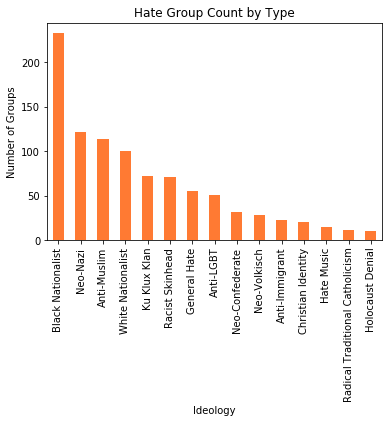

In [96]:
colors = '#ff7a33'
labels = types_df.index
types_df.plot(kind="bar", align="center", color = str(colors), legend = False)
plt.title("Hate Group Count by Type")
plt.xlabel("Ideology")
plt.ylabel("Number of Groups")

In [ ]:
#get change over time analysis
total2014 = mass_2014['Total_Victims'].sum()